In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

In [153]:
from sklearn import preprocessing

In [165]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [166]:
data = pd.read_csv('TP_1_prostate_dataset.txt', sep='\t')
data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [167]:
X = data.drop(columns=['col', 'lpsa', 'train'])
y = data['lpsa']

In [168]:
X = preprocessing.StandardScaler().fit_transform(X)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [170]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77, 8)
(20, 8)
(77,)
(20,)


In [171]:
# définition du modèle
model = LinearRegression()

# définition de la grille de paramètres
params_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]   
}

In [172]:
# entrainement du modèle avec chacun des hyperparamètres de la grille avec validation croisée
grid = GridSearchCV(estimator=model, param_grid=params_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [173]:
# meilleur estimateur
grid.best_estimator_

LinearRegression(positive=True)

In [174]:
# meilleur score
grid.best_score_

0.49609953848092464

In [175]:
grid.cv_results_

{'mean_fit_time': array([0.00139499, 0.00120211, 0.001195  , 0.00099945]),
 'std_fit_time': array([4.92754461e-04, 3.99384269e-04, 3.99118524e-04, 5.84003864e-07]),
 'mean_score_time': array([0.00019989, 0.00080037, 0.00059896, 0.00059962]),
 'std_score_time': array([0.00039978, 0.00040034, 0.00048905, 0.00048959]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_positive': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'positive': True},
  {'fit_intercept': True, 'positive': False},
  {'fit_intercept': False, 'positive': True},
  {'fit_intercept': False, 'positive': False}],
 'split0_test_score': array([-0.16289378, -0.04481211, -8.45749546, -9.9931092 ]),
 'split1_test_score': array([ 0.59194181,  0.4225451 , -7.9075405 ,

In [180]:
# moyenne des erreurs au carré
baseline_error = np.mean((grid.best_estimator_.predict(X_test) - y_test)**2)
baseline_error

0.5775993321800683

In [176]:
# score du modèle avec les meilleurs hyperparamètres sur le jeu de test
grid.best_estimator_.score(X_test, y_test)

0.4119118000591194

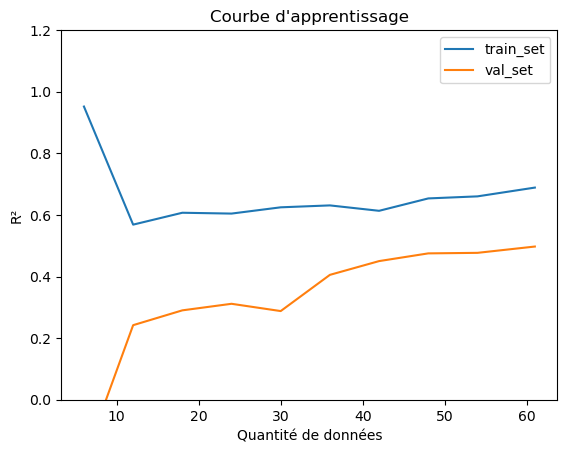

In [177]:
# courbe d'apprentissage

# courbe d'apprentissage
#warnings.simplefilter('ignore')

N, train_score, val_score = learning_curve(grid.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title("Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

## Comparaison de plusieurs modèles

In [178]:
LinearRegression = LinearRegression()
Ridge = Ridge()
Lasso = Lasso()
ElasticNet = ElasticNet()

models = {'LinearRegression' : LinearRegression, 
         'Ridge' : Ridge, 
         'Lasso' : Lasso,
         'ElasticNet' : ElasticNet}

### Comparaison des scores

In [151]:
for nom, model in models.items() :
    print(nom)
    
    model.fit(X_train, y_train)
    
    print('validation score :', cross_val_score(model, X_train, y_train, cv=5).mean())
    print('score :', model.score(X_test, y_test))
    print(model.coef_)
    
    print('_'*100)

LinearRegression
validation score : 0.49171307241628853
score : 0.41508513386617885
[ 0.5633546   0.64146808 -0.02047698  0.09869604  0.72252084 -0.02264095
 -0.04354112  0.00391319]
____________________________________________________________________________________________________
Ridge
validation score : 0.4935646162537207
score : 0.4135417384068343
[ 0.56230984  0.59361457 -0.0193273   0.09890138  0.62437366 -0.00135856
 -0.0508753   0.0040687 ]
____________________________________________________________________________________________________
Lasso
validation score : 0.13474205576887316
score : 0.03140679087861742
[0.         0.         0.         0.         0.         0.
 0.         0.01727359]
____________________________________________________________________________________________________
ElasticNet
validation score : 0.27895453850320984
score : 0.19190561210417167
[0.18562738 0.         0.         0.         0.         0.
 0.         0.01435725]
___________________________

### Comparaison des courbes d'apprentissage

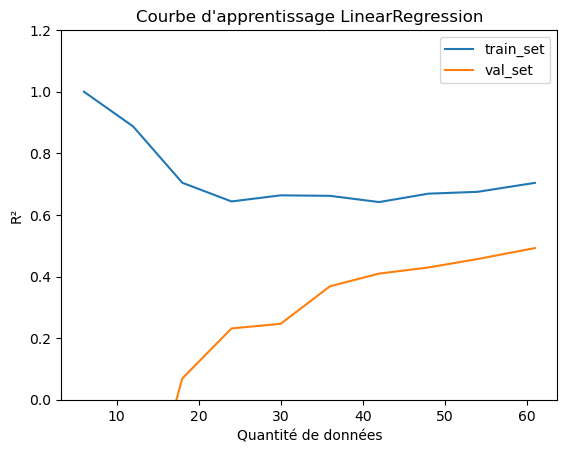

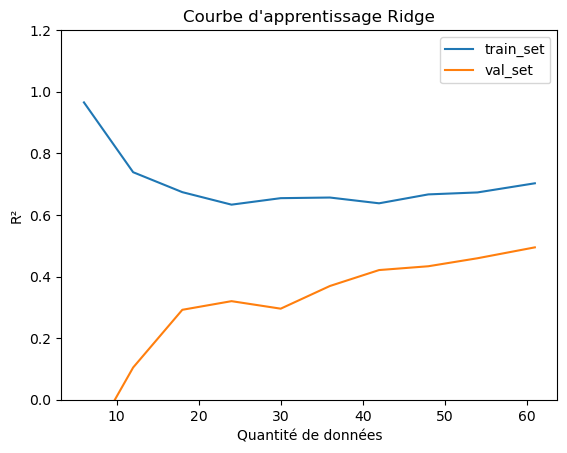

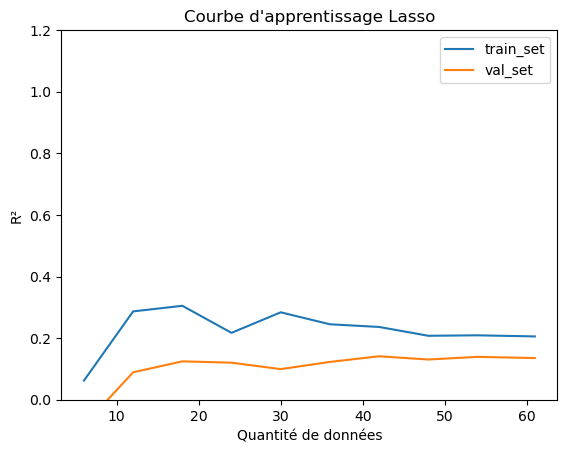

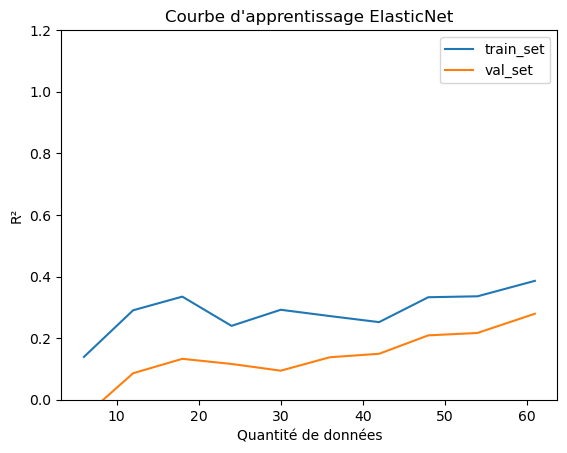

In [152]:
for nom, model in models.items() :
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

    plt.title(f"Courbe d'apprentissage {nom}")
    plt.plot(N, train_score.mean(axis=1), label='train_set')
    plt.plot(N, val_score.mean(axis=1), label='val_set')
    plt.xlabel("Quantité de données")
    plt.ylabel("R²")
    plt.ylim((0,1.2))
    plt.legend()
    plt.show()